In [2]:
import numpy as np
    
class CombinedModel:
    def __init__(self, clf_model, reg_model):
        self.clf_model = clf_model
        self.reg_model = reg_model

    def predict(self, X):
        """輸入 X 為經緯度座標，輸出分類為 -999 或預測溫度"""
        y_clf = self.clf_model.predict(X)
        y_reg = self.reg_model.predict(X)

        # 合併輸出：陸地→預測溫度；海洋→-999
        result = np.where(y_clf == 1, y_reg, -999)
        return result

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 讀入分類資料
df_cls = pd.read_csv("classification_data.csv")  # (lon, lat, label)
X_cls = df_cls[['lon', 'lat']]
y_cls = df_cls['label']

# 分割分類資料
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# 讀入迴歸資料
df_reg = pd.read_csv("regression_data.csv")  # (lon, lat, value)
X_reg = df_reg[['lon', 'lat']]
y_reg = df_reg['value']

# 分割迴歸資料
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
combined_model = CombinedModel(
    clf_model = RandomForestClassifier(),
    reg_model = RandomForestRegressor()
)

In [7]:
# 訓練分類模型
combined_model.clf_model.fit(X_cls_train, y_cls_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# 訓練回歸模型
combined_model.reg_model.fit(X_reg_train, y_reg_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_combined = combined_model.predict(X_cls)

In [10]:
results = np.column_stack((X_cls, y_combined))

In [11]:
np.savetxt("forest_results.csv", results, delimiter=",", header="lon,lat,value", comments='')

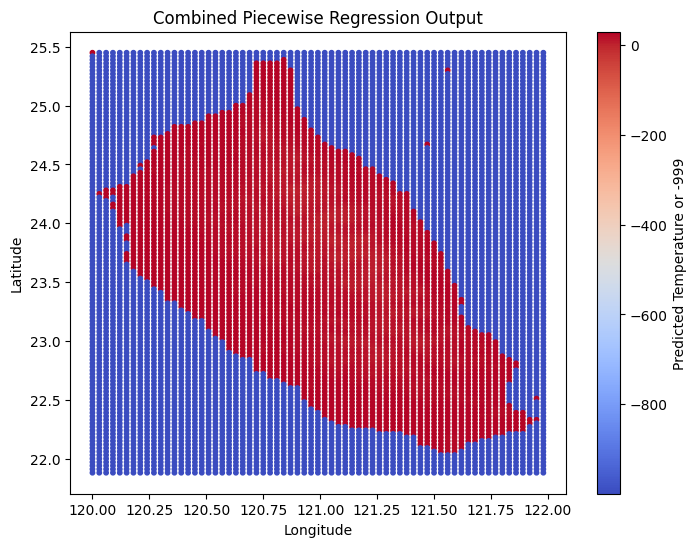

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sc = plt.scatter(results[:,0],results[:,1], c=y_combined, cmap='coolwarm', s=10)
plt.colorbar(sc, label="Predicted Temperature or -999")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Combined Piecewise Regression Output")
plt.show()